In [1]:
import pandas as pd
data=pd.read_csv("/Users/abirami/Documents/DATA SCIENCE INTERNSHIP/Dataset .csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


CLEANING AND ENCODING

In [2]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [3]:
df=data.copy()
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
df.dropna(subset=['Cuisines'], inplace=True)

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
irrelevant_features = ['Restaurant ID','Restaurant Name','Country Code','City', 'Address','Locality', 'Locality Verbose','Longitude', 'Latitude','Cuisines', 'Votes', 'Price range','Currency']
df_t1 = df.drop(columns=irrelevant_features)
print(df_t1.head())


   Average Cost for two Has Table booking Has Online delivery  \
0                  1100               Yes                  No   
1                  1200               Yes                  No   
2                  4000               Yes                  No   
3                  1500                No                  No   
4                  1500               Yes                  No   

  Is delivering now Switch to order menu  Aggregate rating Rating color  \
0                No                   No               4.8   Dark Green   
1                No                   No               4.5   Dark Green   
2                No                   No               4.4        Green   
3                No                   No               4.9   Dark Green   
4                No                   No               4.8   Dark Green   

  Rating text  
0   Excellent  
1   Excellent  
2   Very Good  
3   Excellent  
4   Excellent  


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_t1['Has Table booking'] = label_encoder.fit_transform(df_t1['Has Table booking'])
df_t1['Has Online delivery'] = label_encoder.fit_transform(df_t1['Has Online delivery'])
df_t1['Is delivering now'] = label_encoder.fit_transform(df_t1['Is delivering now'])
df_t1['Switch to order menu'] = label_encoder.fit_transform(df_t1['Switch to order menu'])
df_t1['Rating color'] = label_encoder.fit_transform(df_t1['Rating color'])
df_t1['Rating text'] = label_encoder.fit_transform(df_t1['Rating text'])

In [8]:
df_t1.to_csv('/Users/abirami/Documents/DATA SCIENCE INTERNSHIP/t1.csv',index=False)

VISUALIZATION

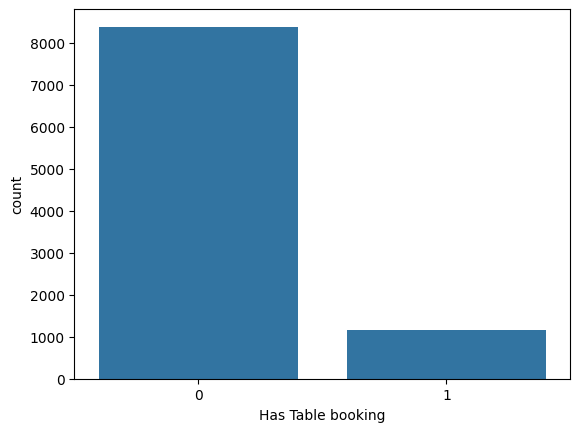

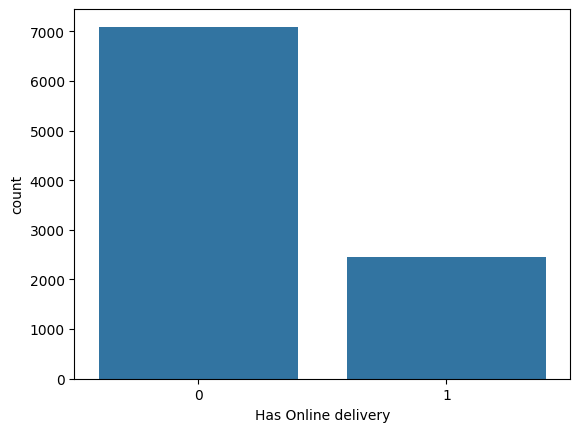

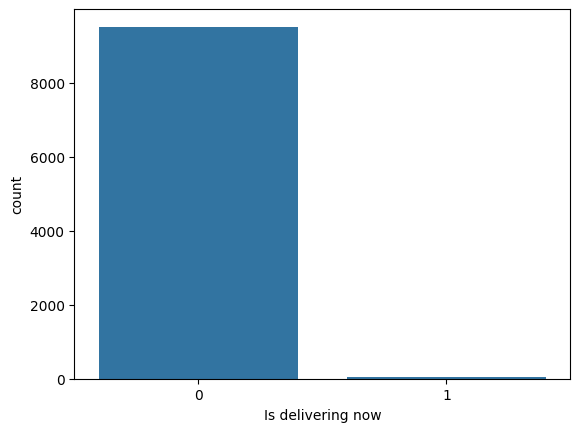

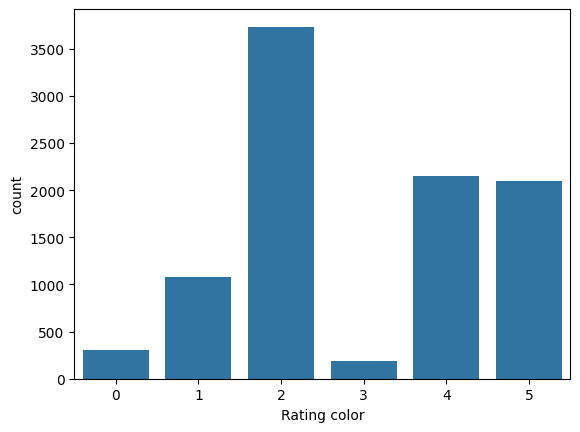

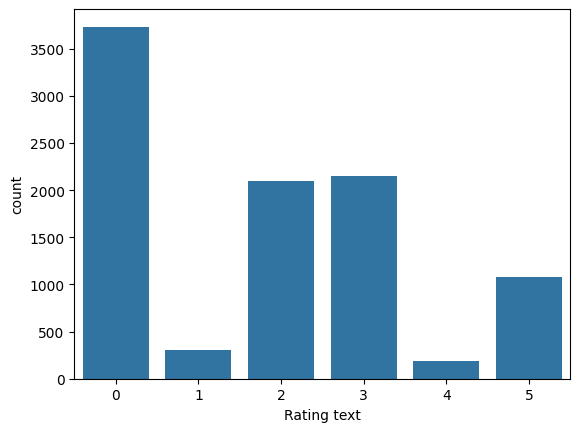

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

features=['Has Table booking','Has Online delivery','Is delivering now','Rating color','Rating text']

for i in features:
    sns.countplot(data=df_t1,x=i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

<Axes: xlabel='Aggregate rating', ylabel='Count'>

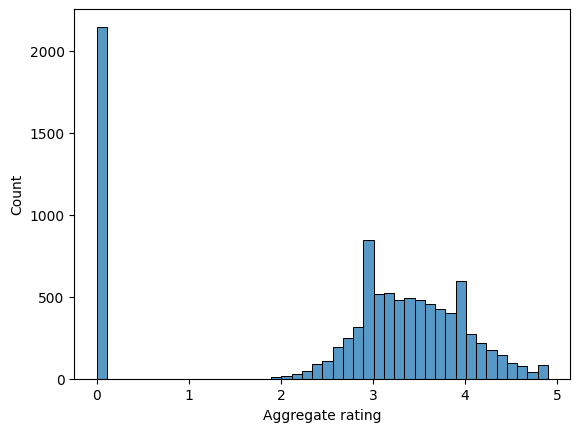

In [10]:
sns.histplot(data=df_t1,x='Aggregate rating')

SPLITTING FEATURES INTO TRAINING AND TESTING SET

In [11]:
from sklearn.model_selection import train_test_split

X=df_t1.drop('Aggregate rating',axis=1)
Y=df_t1['Aggregate rating']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


LINEAR REGRESSION MODEL AND PERFORMING REGRESSION METRICS

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_pred=lin_reg.predict(X_test)

MAE=mean_absolute_error(Y_test,Y_pred)
R2=r2_score(Y_test,Y_pred)

print("linear regression model")
print('mean absolute error:',MAE)
print('r2 score:',R2)

linear regression model
mean absolute error: 1.1054844375254604
r2 score: 0.2228120766611963


DECISION TREE REGRESSION MODEL AND PERFORMING REGRESSION METRICS

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,Y_train)
Y_predict_tree=tree_reg.predict(X_test)

MAE_tree=mean_absolute_error(Y_test,Y_predict_tree)
R2_tree=r2_score(Y_test,Y_predict_tree)

print("decision tree regression model")
print('mean absolute error:',MAE_tree)
print('r2 score:',R2_tree)

decision tree regression model
mean absolute error: 0.13125812645794788
r2 score: 0.9848300033803248


CONCLUSION:

Decision Tree Regression significantly over performs Linear Regression in both MAE and R². The decision tree has a lower error (MAE) and a much higher R², suggesting it is better suited for the dataset and more capable of capturing complex relationships in the data.
